# Testing base results for Genes

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
import scikitplot.plotters as skplt
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split


In [4]:
#Stage 2 data
df_train = pd.read_pickle('df_train')
df_test = pd.read_pickle('df_test')

In [31]:
df_train.Gene.unique()

array(['FAM58A', 'CBL', 'SHOC2', 'TERT', 'DICER1', 'PTPRT', 'RHEB', 'SHQ1',
       'CCND2', 'RAD50', 'CCND3', 'RIT1', 'CCNE1', 'RYBP', 'TGFBR1',
       'TGFBR2', 'MSH6', 'KMT2D', 'LATS1', 'PBRM1', 'SF3B1', 'LATS2',
       'EGFR', 'NKX2-1', 'EIF1AX', 'ARID2', 'BRD4', 'HIST1H1C', 'ERRFI1',
       'CHEK2', 'PAK1', 'TMPRSS2', 'H3F3A', 'ELF3', 'ROS1', 'ASXL2',
       'CDH1', 'EPCAM', 'EP300', 'EPAS1', 'TP53', 'TP53BP1', 'SMAD2',
       'SMAD3', 'SMAD4', 'CDK4', 'AURKB', 'CDK6', 'FBXW7', 'CDK8',
       'CDKN1A', 'CDKN1B', 'CDKN2A', 'CDKN2B', 'CDKN2C', 'ASXL1', 'ERBB2',
       'ERBB3', 'ERBB4', 'ERCC2', 'BRIP1', 'ERCC3', 'ERCC4', 'ABL1',
       'CEBPA', 'ERG', 'HLA-A', 'HLA-B', 'PDGFRA', 'PDGFRB', 'RBM10',
       'KDM5C', 'ESR1', 'ETV1', 'ETV6', 'TSC1', 'IKZF1', 'TSC2', 'EWSR1',
       'ACVR1', 'FOXA1', 'MDM2', 'ARID1A', 'EZH2', 'MDM4', 'KLF4', 'RXRA',
       'MAP3K1', 'AXIN1', 'BAP1', 'MEN1', 'FANCA', 'FANCC', 'MET', 'U2AF1',
       'KMT2C', 'FAT1', 'ARID1B', 'PIK3CA', 'PIK3CB', 'PIM1', 'PIK

In [6]:
len(df_train.Gene.unique())

269

In [7]:
df_train['Gene'].values

array(['FAM58A', 'CBL', 'CBL', ..., 'MAP2K1', 'ATM', 'TP53'], dtype=object)

In [8]:
#tokenizer = Tokenizer(num_words=None,lower=True)
tokenizer = Tokenizer(num_words=None,lower=True,char_level=True)

tokenizer.fit_on_texts(df_train['Gene'].values)

X = tokenizer.texts_to_sequences(df_train['Gene'].values)
X = pad_sequences(X)

In [9]:
X

array([[ 0,  0,  8, ..., 22, 33,  2],
       [ 0,  0,  0, ...,  5,  6, 18],
       [ 0,  0,  0, ...,  5,  6, 18],
       ..., 
       [ 0,  0, 15, ...,  9, 10,  3],
       [ 0,  0,  0, ...,  2,  4, 15],
       [ 0,  0,  0, ...,  7, 22, 14]], dtype=int32)

In [10]:
X.shape[1]

8

In [11]:
words = len(tokenizer.word_index)

In [12]:
ckpt_callback = ModelCheckpoint('gene_model_1',
                                 monitor='val_loss',
                                 verbose=1,
                                 save_best_only=True,
                                 mode='auto')


In [13]:
model = Sequential()
model.add(Embedding(words+1, 128, input_length = X.shape[1]))
model.add(LSTM(196, recurrent_dropout=0.5, dropout=0.5))
model.add(Dense(9, kernel_initializer='normal',activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['categorical_crossentropy','accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8, 128)            4864      
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1773      
Total params: 261,437
Trainable params: 261,437
Non-trainable params: 0
_________________________________________________________________
None


In [14]:

Y = pd.get_dummies(df_train['Class']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify=Y)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
batch_size = 16

(2951, 8) (2951, 9)
(738, 8) (738, 9)


In [15]:
X_test

array([[ 0,  0,  0, ...,  6, 18,  3],
       [ 0,  0,  0, ..., 25, 20, 18],
       [ 0,  0,  0, ...,  4, 11, 12],
       ..., 
       [ 0,  0,  0, ...,  6,  4, 10],
       [ 0,  0,  0, ..., 10, 19,  4],
       [ 0,  0,  5, ..., 12,  9,  2]], dtype=int32)

In [16]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=batch_size, validation_split=0.2,shuffle=True, callbacks=[ckpt_callback])


Train on 2360 samples, validate on 591 samples
Epoch 1/10
2360/2360 [==============================] - 3s - loss: 1.8311 - categorical_crossentropy: 1.8311 - acc: 0.3038 - val_loss: 1.6407 - val_categorical_crossentropy: 1.6407 - val_acc: 0.4061
Epoch 2/10
2360/2360 [==============================] - 2s - loss: 1.5928 - categorical_crossentropy: 1.5928 - acc: 0.4144 - val_loss: 1.5174 - val_categorical_crossentropy: 1.5174 - val_acc: 0.4636
Epoch 3/10
2360/2360 [==============================] - 2s - loss: 1.4983 - categorical_crossentropy: 1.4983 - acc: 0.4568 - val_loss: 1.4842 - val_categorical_crossentropy: 1.4842 - val_acc: 0.4788
Epoch 4/10
2360/2360 [==============================] - 2s - loss: 1.4389 - categorical_crossentropy: 1.4389 - acc: 0.4737 - val_loss: 1.4126 - val_categorical_crossentropy: 1.4126 - val_acc: 0.4788
Epoch 5/10
2360/2360 [==============================] - 2s - loss: 1.3910 - categorical_crossentropy: 1.3910 - acc: 0.4987 - val_loss: 1.3943 - val_categoric

dict_keys(['val_categorical_crossentropy', 'val_loss', 'acc', 'loss', 'val_acc', 'categorical_crossentropy'])


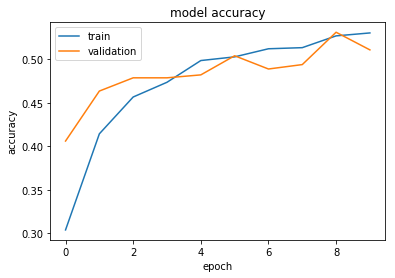

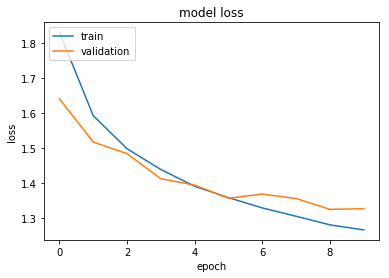

In [17]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
df_test['Gene'].head(5)

0     CHEK2
1     AXIN2
2      WNT4
3    SUCLA2
4      BRAF
Name: Gene, dtype: object

In [19]:
model = load_model('gene_model_1')

In [20]:
#df_Xt = pd.DataFrame({'x':X_test})
#probas = model.predict(test)
#X_test = tokenizer.texts_to_sequences(df_test['Gene'].values)
#X_test = tokenizer.texts_to_sequences(df+Xt['x'.values])
#X_test = pad_sequences(X_test,maxlen=2)
#X_test

In [25]:
probas = model.predict(X_test)

In [29]:
%matplotlib inline
import scikitplot

Log loss: 1.239366044257553
Accuracy: 0.510840108401084


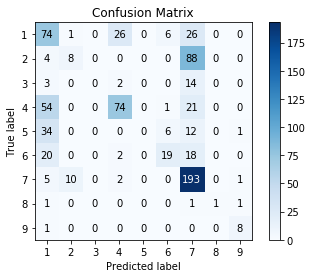

In [30]:
pred_indices = np.argmax(probas, axis=1)
classes = np.array(range(1, 10))
preds = classes[pred_indices]
print('Log loss: {}'.format(log_loss(classes[np.argmax(Y_test, axis=1)], probas)))
print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(Y_test, axis=1)], preds)))
scikitplot.metrics.plot_confusion_matrix(classes[np.argmax(Y_test, axis=1)], preds)


In [24]:
submission_df = pd.DataFrame(probas, columns=['class'+str(c+1) for c in range(9)])
submission_df['ID'] = df_test['ID']
submission_df.head()

submission_df.to_csv('submission_Gene.csv', index=False)